In [213]:
import pandas as pd

In [214]:
df = pd.read_csv('Madedata1.csv')

In [215]:
df.head(10)

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1
5,Spain,45,Female,99,1,0,0,0,1,Mild,Not known,1
6,Germany,24,Female,98,0,0,0,0,1,Mild,No,0
7,UAE,37,Male,99,0,0,1,1,1,Moderate,Not known,1
8,Russia,40,Male,101,0,1,1,1,0,Moderate,Yes,1
9,Canada,37,Female,100,0,1,0,0,0,Mild,No,0


In [216]:
df.shape

(2499, 12)

# We need to apply LabelEncoding to convert text datas from columns into numbers e.g 0,1,2,3....
# It works alphabetically

In [217]:
pd.value_counts(df['Gender'])

Male           1257
Female         1208
Transgender      34
Name: Gender, dtype: int64

In [218]:
pd.value_counts(df['Severity'])

Mild        1591
Moderate     525
Severe       383
Name: Severity, dtype: int64

In [219]:
pd.value_counts(df['Contact_with_covid_patient'])

No           1203
Yes           638
Not known     633
yes            25
Name: Contact_with_covid_patient, dtype: int64

**We need to convert every text to lower case**

In [220]:
df['Contact_with_covid_patient'] = df['Contact_with_covid_patient'].str.lower()

In [221]:
pd.value_counts(df['Contact_with_covid_patient'])

no           1203
yes           663
not known     633
Name: Contact_with_covid_patient, dtype: int64

In [222]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [223]:
gender_label = LabelEncoder()
df['Gender'] = gender_label.fit_transform(df['Gender'])

In [224]:
pd.value_counts(df['Gender'])

1    1257
0    1208
2      34
Name: Gender, dtype: int64

In [225]:
severity_label = LabelEncoder()
df['Severity'] = severity_label.fit_transform(df['Severity'])

In [226]:
contact_label = LabelEncoder()
df['Contact_with_covid_patient'] = severity_label.fit_transform(df['Contact_with_covid_patient'])

In [227]:
gender = df['Gender'].values
severity = df['Severity'].values
contact = df['Contact_with_covid_patient'].values

In [228]:
gender

array([1, 1, 2, ..., 0, 0, 0])

In [229]:
severity

array([0, 1, 2, ..., 0, 0, 2])

In [230]:
contact

array([0, 1, 0, ..., 2, 1, 2])

# After doing LabelEncoding we found that there are 3 classes in gender etc. So we need to do OneHotEncoding to convert it into binary by making necessary individual columns(please check txt file in folder)

In [231]:
gender_onehot = OneHotEncoder()
gender = gender_onehot.fit_transform(gender.reshape(-1,1)) # reshape is there because OneHotEncoding needs 2D array

In [232]:
gender

<2499x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2499 stored elements in Compressed Sparse Row format>

In [233]:
gender = gender.toarray()

In [234]:
gender

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [235]:
severity_onehot = OneHotEncoder()
severity = severity_onehot.fit_transform(severity.reshape(-1,1)).toarray()

In [236]:
severity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [237]:
contact_onehot = OneHotEncoder()
contact = contact_onehot.fit_transform(contact.reshape(-1,1)).toarray()

In [238]:
contact

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [239]:
df.columns

Index(['Country', 'Age', 'Gender', 'fever', 'Bodypain', 'Runny_nose',
       'Difficulty_in_breathing', 'Nasal_congestion', 'Sore_throat',
       'Severity', 'Contact_with_covid_patient', 'Infected'],
      dtype='object')

In [240]:
# drop columns
df.drop(columns=['Gender','Country','Severity','Contact_with_covid_patient'],inplace=True)

In [241]:
df.head(5)

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
0,10,102,1,0,0,0,1,0
1,20,103,1,1,0,0,0,1
2,55,99,0,0,0,1,1,0
3,37,100,0,1,1,0,0,1
4,45,101,1,1,1,1,0,1


In [242]:
X = df.iloc[:,:-1].values

In [243]:
y = df.iloc[:,-1].values

In [244]:
# Merge three columns which we have onehotencoded with X
import numpy as np

In [245]:
X = np.c_[X,gender,severity,contact]

In [246]:
X[0]

array([ 10., 102.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
         0.,   0.,   1.,   0.,   0.])

In [247]:
y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

# Feature Scaling(here we use Normalization)
**Because we need to Normalize the fever column with others**
It converts b/w 0-1

In [248]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [249]:
X[0]

array([0.        , 0.66666667, 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

# Train & Test split

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [251]:
X_train.shape

(1999, 16)

In [252]:
X_test.shape

(500, 16)

# Logistic Regression Applying 
**For ML model training**

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [255]:
y_pred = model.predict(X_test)

In [256]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred) #Accuracy Score 94%

0.938

In [257]:
confusion_matrix(y_test,y_pred)

array([[233,  19],
       [ 12, 236]], dtype=int64)

In [258]:
y_pred.shape

(500,)

In [259]:
# Correct Prediction
217+254

471

In [260]:
# wrong prediction
12+17

29

In [261]:
# Sensitivity
217/(217+17)

0.9273504273504274

In [262]:
# Specificity
254/(254+12)

0.9548872180451128

# ROC AUC Curve

In [263]:
import matplotlib.pyplot as plt

In [264]:
from sklearn.metrics import roc_curve

In [265]:
pred_prob = model.predict_proba(X_test)

In [266]:
pred_prob[:,1]

array([1.40924856e-03, 1.57941027e-03, 3.01498740e-03, 1.45821602e-03,
       2.69710861e-01, 9.25670000e-03, 9.29609930e-01, 2.69710861e-01,
       2.64002005e-03, 1.40924856e-03, 2.75313490e-02, 9.29609930e-01,
       9.82546586e-01, 9.99496561e-01, 9.55927144e-01, 9.98694805e-01,
       9.45937686e-01, 9.73854751e-01, 1.27283187e-03, 9.99140692e-01,
       9.25670000e-03, 1.40924856e-03, 1.40924856e-03, 1.57941027e-03,
       8.14952051e-01, 9.55927144e-01, 6.42256337e-02, 9.99140692e-01,
       4.36739839e-01, 9.29609930e-01, 1.45821602e-03, 2.75313490e-02,
       7.30086058e-01, 2.64002005e-03, 9.59994262e-01, 9.73854751e-01,
       9.98694805e-01, 2.75313490e-02, 2.39892552e-03, 2.69710861e-01,
       9.29609930e-01, 2.75313490e-02, 9.70667968e-01, 9.82546586e-01,
       4.36739839e-01, 2.63388693e-02, 6.96463387e-01, 2.69710861e-01,
       7.95865407e-01, 2.75313490e-02, 9.98748194e-01, 9.29609930e-01,
       9.33237252e-04, 7.10449517e-01, 2.98652613e-01, 9.66731664e-01,
      

In [267]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1],pos_label=1)

In [268]:
#thresh

random_prob = [0 for i in range(len(y_test))]
p_tpr, p_fpr, _ = roc_curve(y_test, random_prob, pos_label = 1)

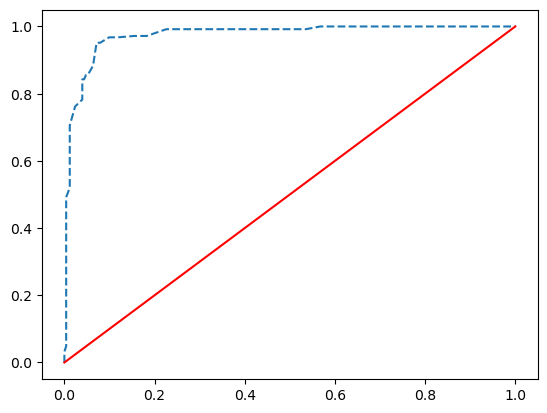

In [269]:
plt.plot(fpr,tpr,linestyle='--')
plt.plot(p_fpr, p_tpr, color='red')
plt.show()

# To save python ML file for GUI app 

In [270]:
import pickle as pkl

In [271]:
file = open('model.pkl','wb')
pkl.dump(model, file)

In [272]:
file.close()

In [273]:
file = open('gender_label.pkl','wb')
pkl.dump(gender_label, file)
file.close()

file = open('gender_onehot.pkl','wb')
pkl.dump(gender_onehot, file)
file.close()

file = open('severity_label.pkl','wb')
pkl.dump(severity_label, file)
file.close()

file = open('severity_onehot.pkl','wb')
pkl.dump(severity_onehot, file)
file.close()

file = open('contact_label.pkl','wb')
pkl.dump(contact_label, file)
file.close()

file = open('contact_onehot.pkl','wb')
pkl.dump(contact_onehot, file)
file.close()

In [274]:
file = open('minmax.pkl','wb')
pkl.dump(minmax, file)
file.close()